# Introduction au Reinforcement Learning #

L'apprentissage par renforcement est une branche de l'intelligence artificielle spécialisé dans l'apprentissage autonome d'un agent plongé dans un environnement inconnu.

Bon ce sont de bien grands mots et on va voir de quoi il en retourne concrétement.

Afin d'illustrer plus facilement nous allons essayer de faire jouer notre agent au Morpion (ou tic-tac-toe). Tout le monde connait ce jeu, n'est ce pas ?

Il s'agit donc d'un jeu qui se joue à 2. Sur une grille de 3x3 chacun leur tour les joueur mettent une croix ou un cercle sur une case de la grille. Le premier qui aligne 3 symboles identiques (en ligne, colonne ou diagonale) à gagner.

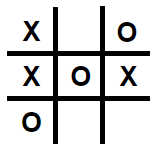

## Le code du jeu ##

Bon on va coder ça rapidement et efficacement ! Pas forcément optimalement donc. (j'invente des mots si je veux !)

**Vous pouvez sauter cette partie si cela ne vous intéresse pas, c'est pas vraiment le sujet principal de ce notebook**

In [35]:
# Comme toujours on reseve une cellule pour l'import de nos modules
import random

In [36]:
# Pour commencer il nous faut une grille de jeu vide
grille_taille = 3
grille = [[' ' for i in range(grille_taille)] for j in range(grille_taille)]

# On ajoute une petite fonction pour la visualiser quand on veut
def print_grille(grille):
    '''Affiche une grille
    
    argument : grille de taille nxn (liste)'''
    for i, ligne in enumerate(grille):
        l = ''
        l2 = ''
        for j, colonne in enumerate(ligne):
            l = l + ligne[j] + '│' if j < len(ligne) - 1 else l + ligne[j]
            if i < len(grille) - 1:
                l2 = l2 + '─' + '┼' if j < len(ligne) - 1 else l2 + '─'
        print(l)
        print(l2)
        
print_grille(grille)    

 │ │ 
─┼─┼─
 │ │ 
─┼─┼─
 │ │ 



Ok maintenant simulons un tour d'une partie

In [37]:
# le joueur 1 met son symbôle sur une case
grille[1][1] = 'O'

print_grille(grille)

 │ │ 
─┼─┼─
 │O│ 
─┼─┼─
 │ │ 



C'est au tour du joueur 2 mais attention il ne peut pas joué sur la case déjà jouée. Donc il va devoir choisir une case et si elle est occupée, il devra en choisir une autre. Et cela autant de fois qu'il n'a pas trouvé une case vide.

In [38]:
# Petite fonction de vérification de la possibilité de jouer cette case
def case_vide(grille, case):
    '''Vérification de la case
    
    arguments:
    - grille (liste)
    - case (index de colonne, index de ligne) (tuple)
    
    Renvoit boolean'''
    
    if grille[case[0]][case[1]] == ' ':
        return True
    else:
        return False

# joueur 2 peut faire son choix de case
case = (0, 0)

# Vérifier si c'est bon
if case_vide(grille, case):
    grille[case[0]][case[1]] = 'X'
else:
    print('Case déjà remplie, merci de choisir une autre case')

print_grille(grille)

X│ │ 
─┼─┼─
 │O│ 
─┼─┼─
 │ │ 



Etape suivante, on doit vérifier si le jeu est fini. Pour ce faire, il faut vérifier si un joueur a gagné (alignement de ses symboles) ou qu'il n'y ai plus de case vide.

In [39]:
# Là encore, on fait une petite fonction de vérification
def fin(grille):
    '''Vérification si le jeu est terminé
    
    argument : grille de jeu (liste)
    
    renvoit un boolean ou le symbole gagnant'''
    
    # Parcourt les ligne, les colonnes et les diagonales
    diagonale1 = []
    diagonale2 = []
    cases_pleines = True
    for i, ligne in enumerate(grille):
        if len(set(ligne)) == 1 and ' ' not in ligne:
            return ligne[0]
        colonne = []
        for j in range(len(ligne)):
            colonne += [grille[j][i]]
        if len(set(colonne)) == 1 and ' ' not in colonne:
            return colonne[0]
        diagonale1 += [grille[i][i]]
        diagonale2 += [grille[i][-1-i]]
        if ' ' in ligne:
            cases_pleines = False
    
    # Vérification des diagonales
    if len(set(diagonale1)) == 1 and ' ' not in diagonale1:
        return diagonale1[0]
    if len(set(diagonale2)) == 1 and ' ' not in diagonale2:
        return diagonale2[0]
    
    # vérification des cases
    if cases_pleines:
        return True
    else:
        return False
    
if fin(grille):
    print("Le jeu est fini")
else:
    print("Le jeu n'est pas fini")
    

Le jeu n'est pas fini


On continue la partie ?

In [40]:
# Joueur 1 refait un choix
case = (0, 1)

# test du choix
if case_vide(grille, case):
    grille[case[0]][case[1]] = 'O'
else:
    print('Case déjà remplie, merci de choisir une autre case')
    
print_grille(grille)

X│O│ 
─┼─┼─
 │O│ 
─┼─┼─
 │ │ 



In [41]:
# Joueur 2
case = (1, 0)

# test du choix
if case_vide(grille, case):
    grille[case[0]][case[1]] = 'X'
else:
    print('Case déjà remplie, merci de choisir une autre case')
    
print_grille(grille)

X│O│ 
─┼─┼─
X│O│ 
─┼─┼─
 │ │ 



In [42]:
# De nouveau le Joueur 1
case = (2, 1)

# test du choix
if case_vide(grille, case):
    grille[case[0]][case[1]] = 'O'
else:
    print('Case déjà remplie, merci de choisir une autre case')
    
print_grille(grille)

X│O│ 
─┼─┼─
X│O│ 
─┼─┼─
 │O│ 



Voilà on y est le joueur 1 a gagné. Vérifions de suite.

In [43]:
if fin(grille):
    if fin(grille) == ' ':
        print('Egalité')
    else:
        print('les', fin(grille), 'ont gagné !')
else:
    print('La partie n\'est pas finie !')

les O ont gagné !


**Pfffff ... ça fait un paquet de cellules pour pas grand chose !**

*Oui mais du coup qu'est ce qu'on peut faire ?*

Et bien on va faire une classe jeu qui va tout faire pour nous.

*Beurk... J'aime pas les classes c'est relou :(*

Allez un peu de courage, ça nous simplifiera la tâche pour plus tard.b

In [44]:
class Morpion:
    '''Le jeu du Morpion'''
    
    def __init__(self, size=3):
        self.grille_taille = size
        self.grille = [[' ' for i in range(size)] for j in range(size)]
        
    def action(self, choix, symbole):
        '''Un joueur joue'''
        if self.case_vide(choix):
            self.grille[choix[0]][choix[1]] = symbole
            return True
        else:
            return False
        
    def case_vide(self, case):
        '''Vérification de la case
        Renvoit boolean'''
        if self.grille[case[0]][case[1]] == ' ':
            return True
        else:
            return False
        
    def fin(self):
        '''Vérification si le jeu est terminé
        renvoit un boolean ou le symbole gagnant'''
        diagonale1 = []
        diagonale2 = []
        cases_pleines = True
        for i, ligne in enumerate(self.grille):
            if len(set(ligne)) == 1 and ' ' not in ligne:
                return ligne[0]
            colonne = []
            for j in range(len(ligne)):
                colonne += [self.grille[j][i]]
            if len(set(colonne)) == 1 and ' ' not in colonne:
                return colonne[0]
            diagonale1 += [self.grille[i][i]]
            diagonale2 += [self.grille[i][-1-i]]
            if ' ' in ligne:
                cases_pleines = False
        if len(set(diagonale1)) == 1 and ' ' not in diagonale1:
            return diagonale1[0]
        if len(set(diagonale2)) == 1 and ' ' not in diagonale2:
            return diagonale2[0]
        if cases_pleines:
            return True
        else:
            return False
        
    def print_grille(self):
        '''Affiche la grille'''
        for i, ligne in enumerate(self.grille):
            l = ''
            l2 = ''
            for j, colonne in enumerate(ligne):
                l = l + ligne[j] + '│' if j < len(ligne) - 1 else l + ligne[j]
                if i < len(self.grille) - 1:
                    l2 = l2 + '─' + '┼' if j < len(ligne) - 1 else l2 + '─'
            print(l)
            print(l2)
    
    def reset(self):
        '''Remise à zéro du jeu'''
        self.grille = [[' ' for i in range(self.grille_taille)] for j in range(self.grille_taille)]

On va également créer une classe joueur

In [142]:
class Joueur:
    '''Un joueur de Morpion
    
    nécessite la méthode random.randint
    
    argument :
    - nom : nom du joueur (str)
    - training : Est-ce qu'il s'entraine ? (boolean)'''
    
    def __init__(self, nom, training=True):
        self.resultats = {'victoire': 0, 'défaite':0, 'égalité':0}
        self.nom = nom
        self.liste_choix = []
        self.training = training
    
    def choix(self, grille_taille):
        return (random.randint(0, grille_taille - 1), random.randint(0, grille_taille - 1))
    
    def reset(self):
        self.resultats = {'victoire': 0, 'défaite':0, 'égalité':0}
        
    def save_choice(self, choice):
        self.liste_choix.append(choice)
        

Ok ! On avance... On avance, on avance. C'est une évidence...

*Stoooop !!*

Oh si on peu plus se détendre !

Bon refaisons une partie

In [46]:
# On instancie le jeu

super_jeu = Morpion(3)

# verifions la grille
super_jeu.print_grille()

 │ │ 
─┼─┼─
 │ │ 
─┼─┼─
 │ │ 



In [47]:
# Ok maintenant créons nos joueurs
bob = Joueur('Bob')
mauricette = Joueur('Mauricette')

# laissons mauricette commencer
choix_mauricette = mauricette.choix(super_jeu.grille_taille)

# Est-ce que la case est vide ?
super_jeu.action(choix_mauricette, 'O')

super_jeu.print_grille()    

 │ │ 
─┼─┼─
 │ │ 
─┼─┼─
 │ │O



Bon essayons de continuer en faisant un boucle

In [48]:
while not super_jeu.fin():
    print('Tour de Bob')
    choix_bob = bob.choix(super_jeu.grille_taille)
    while not super_jeu.case_vide(choix_bob):
        choix_bob = bob.choix(super_jeu.grille_taille)
    super_jeu.action(choix_bob, 'X')
    super_jeu.print_grille()
    # Est-ce que le jeu est fini ?
    if super_jeu.fin():
        if super_jeu.fin() == 'X':
            print('Bob a gagné')
            bob.resultats['victoire'] += 1
            mauricette.resultats['défaite'] += 1
        else:
            print('Egalité')
            bob.resultats['égalité'] += 1
            mauricette.resultats['égalité'] += 1
        break
    print('Tour de Mauricette')
    choix_mauricette = mauricette.choix(super_jeu.grille_taille)
    while not super_jeu.case_vide(choix_mauricette):
        choix_mauricette = mauricette.choix(super_jeu.grille_taille)
    super_jeu.action(choix_mauricette, 'O')
    super_jeu.print_grille()
    if super_jeu.fin():
        if super_jeu.fin() == 'O':
            print('Mauricette a gagné')
            bob.resultats['défaite'] += 1
            mauricette.resultats['victoire'] += 1
        else:
            print('Egalité')
            bob.resultats['égalité'] += 1
            mauricette.resultats['égalité'] += 1
        break
    
super_jeu.print_grille()

Tour de Bob
 │ │ 
─┼─┼─
 │ │ 
─┼─┼─
X│ │O

Tour de Mauricette
 │ │ 
─┼─┼─
 │ │ 
─┼─┼─
X│O│O

Tour de Bob
X│ │ 
─┼─┼─
 │ │ 
─┼─┼─
X│O│O

Tour de Mauricette
X│O│ 
─┼─┼─
 │ │ 
─┼─┼─
X│O│O

Tour de Bob
X│O│X
─┼─┼─
 │ │ 
─┼─┼─
X│O│O

Tour de Mauricette
X│O│X
─┼─┼─
 │O│ 
─┼─┼─
X│O│O

Mauricette a gagné
X│O│X
─┼─┼─
 │O│ 
─┼─┼─
X│O│O



In [49]:
# stats des joueurs
print('Résultats de Bob :\n\tVictoires\t', bob.resultats['victoire'],\
      '\n\tDéfaites :\t', bob.resultats['défaite'],\
      '\n\tEgalité :\t', bob.resultats['égalité'])
print('Résultats de Mauricette :\n\tVictoires\t', mauricette.resultats['victoire'],\
      '\n\tDéfaites :\t', mauricette.resultats['défaite'],\
      '\n\tEgalité :\t', mauricette.resultats['égalité'])

Résultats de Bob :
	Victoires	 0 
	Défaites :	 1 
	Egalité :	 0
Résultats de Mauricette :
	Victoires	 1 
	Défaites :	 0 
	Egalité :	 0


*Hé ! Mais ça prend forme dis donc ^^*

Yes :)

Bon faudrait encore automatiser un peu tout ça car après c'est entrainement !! Et comme je suis un gros fainéant, je n'ai pas envie de lancer des cellules de codes pendant des heures !

In [77]:
# Let's make a play function !

def play(jeu, joueurs, show_steps=False):
    '''Une partie de jeu
    
    arguments:
    - jeu : une instance de la class Morpion
    - joueurs : liste de 2 instances de la classe Joueur'''

    import random
    
    # Choix de l'ordre de jeu
    random.shuffle(joueurs)
    
    # Initialisation de la variable nombre de tour
    tour = 0
    
    # Les symboles
    symboles = ['X', 'O']
    
    while not jeu.fin():
        tour += 1
        
        symbole = symboles[tour%2]
        choix_joueur = joueurs[tour%2].choix(jeu.grille_taille)
        while not jeu.case_vide(choix_joueur):
            choix_joueur = joueurs[tour%2].choix(jeu.grille_taille)
        joueurs[tour%2].save_choice(choix_joueur)
        jeu.action(choix_joueur, symbole)
        
        if show_steps:
            print('Tour de ', joueurs[tour%2].nom)
            jeu.print_grille()
        
        # Est-ce que le jeu est fini ?
        if jeu.fin():
            if jeu.fin() == symbole:
                print(joueurs[tour%2].nom, 'a gagné')
                joueurs[tour%2].resultats['victoire'] += 1
                joueurs[tour%2 - 1].resultats['défaite'] += 1
                gagnant = joueurs[tour%2].nom
            else:
                print('Egalité')
                joueurs[tour%2].resultats['égalité'] += 1
                joueurs[tour%2 - 1].resultats['égalité'] += 1
                gagnant = None
    
    jeu.reset()
    
    return gagnant

In [51]:
# Testons
jeu = Morpion()
bob = Joueur('Bob')
mauricette = Joueur('Mauricette')
joueurs = [bob, mauricette]

play(jeu, joueurs, True)

print('Résultats de Bob', bob.resultats)
print('Résultats de Mauricette', mauricette.resultats)

Tour de  Bob
 │O│ 
─┼─┼─
 │ │ 
─┼─┼─
 │ │ 

Tour de  Mauricette
 │O│ 
─┼─┼─
 │ │ 
─┼─┼─
 │ │X

Tour de  Bob
 │O│O
─┼─┼─
 │ │ 
─┼─┼─
 │ │X

Tour de  Mauricette
 │O│O
─┼─┼─
 │X│ 
─┼─┼─
 │ │X

Tour de  Bob
 │O│O
─┼─┼─
O│X│ 
─┼─┼─
 │ │X

Tour de  Mauricette
X│O│O
─┼─┼─
O│X│ 
─┼─┼─
 │ │X

Mauricette a gagné
Résultats de Bob {'victoire': 0, 'défaite': 1, 'égalité': 0}
Résultats de Mauricette {'victoire': 1, 'défaite': 0, 'égalité': 0}


*Oooooh c'est presque magique :)*

Haha ! T'emballes pas trop ! On est loin d'avoir terminé. Bon cela dit une grosse étape est passé là. Il est temps de passer à l'entrainement !

## Entrainement de nos IA random ##

Donc pour rappel, nous avons:
- Une classe "Morpion" (le jeu du morpion)
- Une classe "Joueur"
- Une fonction de jeu "play"

Maintenant nous allons faire jouer nos IA un certains nombre de fois et voir les stats de jeux. Histoire de voir si nos IA deviennent intelligente (enfin jouent de manière intelligente ;) )

In [79]:
# Instanciation
jeu = Morpion()
bob = Joueur('Bob')
mauricette = Joueur('Mauricette')

In [62]:
# On fait combien de parties d'entrainement ?
training = 100

while training > 0:
    print('Partie numéro :', 101 - training)
    play(jeu, [bob, mauricette])
    training -= 1
    
print('------------------------')    
print('Résultat de notre entrainement :')
print('Résultats de ', bob.nom, bob.resultats)
print('Résultats de ', mauricette.nom, mauricette.resultats)
print('Ratios :')
print(bob.nom, 'winning rate =', bob.resultats['victoire'] / 100)
print(mauricette.nom, 'winning rate =', mauricette.resultats['victoire'] / 100)
print('Draw rate =', bob.resultats['égalité'] / 100)

Partie numéro : 1
Bob a gagné
Partie numéro : 2
Mauricette a gagné
Partie numéro : 3
Bob a gagné
Partie numéro : 4
Mauricette a gagné
Partie numéro : 5
Mauricette a gagné
Partie numéro : 6
Mauricette a gagné
Partie numéro : 7
Bob a gagné
Partie numéro : 8
Mauricette a gagné
Partie numéro : 9
Bob a gagné
Partie numéro : 10
Mauricette a gagné
Partie numéro : 11
Bob a gagné
Partie numéro : 12
Mauricette a gagné
Partie numéro : 13
Mauricette a gagné
Partie numéro : 14
Bob a gagné
Partie numéro : 15
Mauricette a gagné
Partie numéro : 16
Bob a gagné
Partie numéro : 17
Bob a gagné
Partie numéro : 18
Bob a gagné
Partie numéro : 19
Mauricette a gagné
Partie numéro : 20
Mauricette a gagné
Partie numéro : 21
Mauricette a gagné
Partie numéro : 22
Mauricette a gagné
Partie numéro : 23
Bob a gagné
Partie numéro : 24
Egalité
Partie numéro : 25
Bob a gagné
Partie numéro : 26
Bob a gagné
Partie numéro : 27
Egalité
Partie numéro : 28
Mauricette a gagné
Partie numéro : 29
Mauricette a gagné
Partie numéro

*Euh... C'est completement nul comme résultats !*

Oui bon cela nous dit pas grand chose comme résultats c'est vrai. Mais cela nous donne une base de comparaison pour plus tard ! On constate les probabilité suivante (en jouant de manière totalement random évidement) :
- Victoires : 44 %
- Défaites : 44 %
- Egalités : 12 %

*Ok mais qu'est ce qu'on fait maintenant :(, je suis perdu*

Bon déjà, il faut comprendre quelque chose d'important ici. Les IA ont joué de manière Random, elle ont fait plein de parties et parcouru un grand nombre de partie possible. (En vrai il y a 9! = 	362 880 possibilités) En quelque sorte, elles ont **exploré** le jeu.

Maintenant il s'agit d'exploiter cette **exploration**

## Exploitation ##

*Comment qu'on fait ?*

Et bien, réfléchissons...

Toujours pas d'idée ?

Et bien on pourrait exploiter des probas. Genre, quel est la probabilité de gagner en commençant sur tel case puis sur tellle autre etc ?

Essayons de programmer ça.

In [87]:
# On reset jeu et joueurs
jeu.reset()
bob.reset()
mauricette.reset()

In [88]:
# On va créer une grille des probas pour le premier tour
grille_proba_1 = [[0 for i in range(jeu.grille_taille)] for j in range(jeu.grille_taille)]

print(grille_proba_1)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [89]:
# On recommence l'entrainement en updatant notre grille de proba
training = 1000
nb_parties = training

while training > 0:

    gagnant = play(jeu, [bob, mauricette])
    
    # on augmente le nombre de partie gagné au départ de la case x
    if gagnant == 'Bob':
        grille_proba_1[bob.liste_choix[0][0]][bob.liste_choix[0][1]] += 1
    elif gagnant == 'Mauricette':
        grille_proba_1[mauricette.liste_choix[0][0]][mauricette.liste_choix[0][1]] += 1
    
    # Reset des choix des joueurs
    bob.liste_choix = []
    mauricette.liste_choix = []
    
    training -= 1

# On calcule les probas des cases
grille_proba_1 = [[x / nb_parties for x in grille] for grille in grille_proba_1]
    
print('------------------------')    
print('Résultat de notre entrainement :')
print('Résultats de ', bob.nom, bob.resultats)
print('Résultats de ', mauricette.nom, mauricette.resultats)
print('Ratios :')
print(bob.nom, 'winning rate =', bob.resultats['victoire'] / nb_parties)
print(mauricette.nom, 'winning rate =', mauricette.resultats['victoire'] / nb_parties)
print('Draw rate =', bob.resultats['égalité'] / nb_parties)
print('Grille des probas de la case 1 :', grille_proba_1)

Bob a gagné
Egalité
Bob a gagné
Egalité
Bob a gagné
Egalité
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Egalité
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Egalité
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Bob a

Héhé ! On voit tout de suite que la case du milieu à l'air plus intéressante pour commencer la partie :)

Maintenant, on peut faire 9 grilles pour calculer la probas de toutes les cases et de tous les choix. Woooo je sens que ça va être galère !

In [200]:
# On reset jeu et joueurs
jeu.reset()
bob.reset()
mauricette.reset()

In [201]:
# On va créer une grille des probas pour les 9 tours max
grille_proba = {t:[[0 for i in range(jeu.grille_taille)] for j in range(jeu.grille_taille)] for t in range(1,10)} 

print(grille_proba)

{1: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 2: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 3: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 4: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 5: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 6: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 7: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 8: [[0, 0, 0], [0, 0, 0], [0, 0, 0]], 9: [[0, 0, 0], [0, 0, 0], [0, 0, 0]]}


In [202]:
# On recommence l'entrainement en updatant cette fois notre grille de proba pour tous les tours !!
training = 1000
nb_parties = training

while training > 0:

    gagnant = play(jeu, [bob, mauricette])
    
    # on augmente le nombre de partie gagné pour chaque case choisie
    if gagnant == 'Bob':
        for i, case in enumerate(bob.liste_choix):
            grille_proba[i+1][bob.liste_choix[i][0]][bob.liste_choix[i][1]] += 1
    elif gagnant == 'Mauricette':
        for i, case in enumerate(mauricette.liste_choix):
            grille_proba[i+1][mauricette.liste_choix[i][0]][mauricette.liste_choix[i][1]] += 1
    
    # Reset des choix des joueurs
    bob.liste_choix = []
    mauricette.liste_choix = []
    
    training -= 1

# On calcule les probas des cases
for tour in range(9):
    grille_proba[tour+1] = [[x / nb_parties for x in grille] for grille in grille_proba[tour+1]]
    
print('------------------------')    
print('Résultat de notre entrainement :')
print('Résultats de ', bob.nom, bob.resultats)
print('Résultats de ', mauricette.nom, mauricette.resultats)
print('Ratios :')
print(bob.nom, 'winning rate =', bob.resultats['victoire'] / nb_parties)
print(mauricette.nom, 'winning rate =', mauricette.resultats['victoire'] / nb_parties)
print('Draw rate =', bob.resultats['égalité'] / nb_parties)
print('Grille des probas de la case 1 :', grille_proba)

Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Egalité
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Egalité
Egalité
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Egalité
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Egalité
Egalit

Hourra !! Y'a plus qu'à tester notre modèle :)

## Test du modèle ##

Bob va se baser sur le modèle tandis que mauricette fera des choix random

In [206]:
# Ré-instanciation
jeu = Morpion()
bob = Joueur('Bob')
mauricette = Joueur('Mauricette')

In [207]:
# modifions un peu le code de la fonction play
def play2(jeu, joueurs, show_steps=False, training=True, model=None):
    '''Une partie de jeu
    
    arguments:
    - jeu : une instance de la class Morpion
    - joueurs : liste de 2 instances de la classe Joueur
    - show_steps : Pour print les étapes (boolean)
    - training : pour dire si joueur 1 s entraine ou choisi "intelligement" (boolean)'''
    
    # Initialisation du joueur "intelligent"
    nom_ia = joueurs[0].nom

    tour = 0
    random.shuffle(joueurs)
    symboles = ['X', 'O']
    
    while not jeu.fin():
        tour += 1
        symbole = symboles[tour%2]
        
        # Qui joue ?
        if joueurs[tour%2].nom == nom_ia:
            dico = {max(l):i for i, l in enumerate(model[tour])}
            ligne = dico[max(dico)]
            colonne = model[tour][ligne].index(max(model[tour][ligne]))
            choix_joueur = (ligne, colonne)
        else:
            choix_joueur = joueurs[tour%2].choix(jeu.grille_taille)
        while not jeu.case_vide(choix_joueur):
            choix_joueur = joueurs[tour%2].choix(jeu.grille_taille)
        joueurs[tour%2].save_choice(choix_joueur)
        jeu.action(choix_joueur, symbole)
        
        # suppression de la case choisie dans le model
        model[tour][choix_joueur[0]][choix_joueur[1]] = 0
        
        if show_steps:
            print('Tour de ', joueurs[tour%2].nom)
            jeu.print_grille()
        if jeu.fin():
            if jeu.fin() == symbole:
                print(joueurs[tour%2].nom, 'a gagné')
                joueurs[tour%2].resultats['victoire'] += 1
                joueurs[tour%2 - 1].resultats['défaite'] += 1
                gagnant = joueurs[tour%2].nom
            else:
                print('Egalité')
                joueurs[tour%2].resultats['égalité'] += 1
                joueurs[tour%2 - 1].resultats['égalité'] += 1
                gagnant = None
    
    jeu.reset()
    
    return gagnant

In [208]:
# let's do some plays
nb_de_parties = 1000
nb_parties = nb_de_parties

while nb_de_parties > 0:
    model = {case[0]:[ligne.copy() for ligne in case[1]] for case in grille_proba.items()}
    play2(jeu, [bob, mauricette], False, False, model)
    
    bob.liste_choix = []
    mauricette.liste_choix = []
    
    nb_de_parties -= 1
    
print('------------------------')    
print('Résultats de ', bob.nom, bob.resultats)
print('Résultats de ', mauricette.nom, mauricette.resultats)
print('Ratios :')
print(bob.nom, 'winning rate =', bob.resultats['victoire'] / nb_parties)
print(mauricette.nom, 'winning rate =', mauricette.resultats['victoire'] / nb_parties)
print('Draw rate =', bob.resultats['égalité'] / nb_parties)

Bob a gagné
Mauricette a gagné
Mauricette a gagné
Egalité
Bob a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Bob a gagné
Egalité
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Egalité
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Egalité
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Mauricette a gagné
Egalité
Bob a gagné
Bob a gagné
Egalité
Egalité
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Bob a gagné
Mauricette a gagné
Bob a gagné
Mauricette a gagné
Mauricette a gagné
Bob a gagné
Bob a gagné
Bob 

**Aha ! On voit boit le score de Bob s'améliorer !! BRAVO NOUS !!!**

*Bon c'était super top intéressant mais c'était un peu construit à l'intuition. Faudrait voir l'etat de l'art sur le sujet non ?*

Minute papillon, on y vient ! Mais d'abord on va repasser en revue les technos de RL du marché de la plus simple à la plus complexe. On a profitera pour voir si ça améliore les perfs de Bob.

On va faire ça dans un second notebook, parceque là ça devient long et mes yeux commencent à pleurer du sang !!

On oublie pas de sauvegarder notre code dans un fichier pour pas le perdre.